<a href="https://colab.research.google.com/github/Rafhaeloktafandhi/Group-Capstone-02-H/blob/main/CS07_GROUP_CAPSTONE_02_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY 07: CLUSTERING ANALYSIS & ASSOCIATION RULE**
-----------------------------------------------
##**Kelompok Studi Case 1C :**
| No | Nama | NIM |
|-------- |-------- | -------- |
| 1 |Siti Nuryani | 11230940000010   |
| 2 |Nur Fadilah Firdaus   | 11230940000023   |
| 3 |Rafhael Oktafandhi | 11230940000033   |
| 4 |Sekar Afifah Cettasami | 11230940000062   |

#**EXPLORATORY DATA ANALYSIS (EDA)**

## **1. MENGUMPULKAN DAN MEMBACA DATA**

In [ ]:
!pip install matplotlib seaborn
!pip install kmodes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes

In [ ]:
!mkdir data
!wget -P data/ https://github.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/raw/refs/heads/main/data/Case-Study-02-MixITup.xlsx

--2025-10-20 09:19:06--  https://github.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/raw/refs/heads/main/data/Case-Study-02-MixITup.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/refs/heads/main/data/Case-Study-02-MixITup.xlsx [following]
--2025-10-20 09:19:06--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/refs/heads/main/data/Case-Study-02-MixITup.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28020 (27K) [application/octet-stream]
Saving to: ‘data/Case-St

In [ ]:
import pandas as pd
import requests
from io import BytesIO

url = "https://github.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/raw/refs/heads/main/data/Case-Study-02-MixITup.xlsx"
resp = requests.get(url)
resp.raise_for_status()

# Membaca Excel dari konten bytes
xlsx = pd.read_excel(BytesIO(resp.content), sheet_name=None)

for sheet_name, df in xlsx.items():
    outname = f"{sheet_name}.csv"
    df.to_csv(outname, index=False, encoding="utf-8")
    print("Saved:", outname)


Saved: TheCase.csv
Saved: Data Understanding.csv
Saved: Data.csv


In [ ]:
data = pd.read_csv('Data.csv')
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


## **2. MEMAHAMI DATA (DATA UNDERSTANDING)**

### **A. DESKRIPSI DATA (DATA DESCRIPTION)**

In [ ]:
data.shape

(200, 10)

Data terdiri dari 200 baris dan 10 kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Informasi yang didapat yaitu data ini memiliki 200 baris dan 10 kolom yang memuat tipe data int64, object5 dan float64

In [ ]:
data.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
data.describe()

,ID,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,200.000000,2.000000e+02,200.00000,194.000000,200.000000
mean,200.500000,1.867213e+07,50.47000,1.685567,3.605000
std,57.879185,1.076423e+07,26.07101,0.970603,2.743466
min,101.000000,0.000000e+00,1.00000,0.000000,0.000000
25%,150.750000,1.086066e+07,34.75000,1.000000,1.000000
50%,200.500000,1.905738e+07,50.00000,1.000000,3.500000
75%,250.250000,2.581967e+07,73.00000,3.000000,6.000000
max,300.000000,5.000000e+07,101.00000,5.000000,9.000000


### **B. PEMERIKSAAAN AWAL DATA**

In [ ]:
# memeriksa duplikat data
data.duplicated().sum()

np.int64(0)

tidak terdapat duklikat data

In [ ]:
#memeriksa missing value

data.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


dapat dilihat bahwa terdapat beberapa missing value pada 3 kolom, yaitu kolom jenis kelamin, menikah, promo. Untuk itu diperlukan dilakukan analisis untuk menggatasi missing value agar mendapatkan hasil analisis yang lebih akurat


In [ ]:
# Mengecek Outlier
kolom_outlier = ['Pendapatan-per-bulan', 'skor-pengeluaran', 'Umur']
print("📊 Deteksi Outlier (Metode IQR):\n")

data['Umur'] = pd.to_numeric(data['Umur'], errors='coerce')

# Drop rows where 'Umur' is NaN after coercion for outlier detection
data_numeric_umur = data.dropna(subset=['Umur']).copy()

for kolom in kolom_outlier:
    # Only proceed if the column is numeric after potential conversion
    if pd.api.types.is_numeric_dtype(data_numeric_umur[kolom]):
        # Hitung Q1, Q3, dan IQR
        Q1 = data_numeric_umur[kolom].quantile(0.25)
        Q3 = data_numeric_umur[kolom].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR

        # Filter data yang outlier
        outlier = data_numeric_umur[(data_numeric_umur[kolom] < batas_bawah) | (data_numeric_umur[kolom] > batas_atas)]

        # Tampilkan hasil
        print(f"Kolom: {kolom}")
        if not outlier.empty:
            print(outlier[[kolom]])
        else:
            print("Tidak ada outlier.")
        print("-" * 50)
    else:
        print(f"Kolom: {kolom}")
        print("Tidak dapat mendeteksi outlier karena kolom bukan tipe numerik.")
        print("-" * 50)

📊 Deteksi Outlier (Metode IQR):

Kolom: Pendapatan-per-bulan
     Pendapatan-per-bulan
66               50000000
102              50000000
--------------------------------------------------
Kolom: skor-pengeluaran
Tidak ada outlier.
--------------------------------------------------
Kolom: Umur
Tidak ada outlier.
--------------------------------------------------


Ditemukan 2 data outlier, yaitu pada baris indeks 66 dan 102, masing-masing dengan nilai Rp 50.000.000.
Nilai ini jauh lebih tinggi dibandingkan distribusi umum data, sehingga dianggap tidak wajar atau ekstrem, untuk kolom skor-pengeluaran, Promo, dan Umur tidak terdapat outlier.

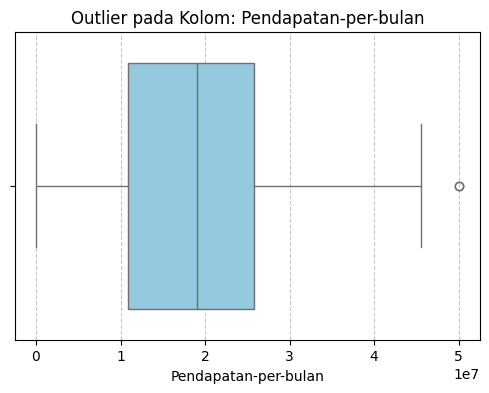

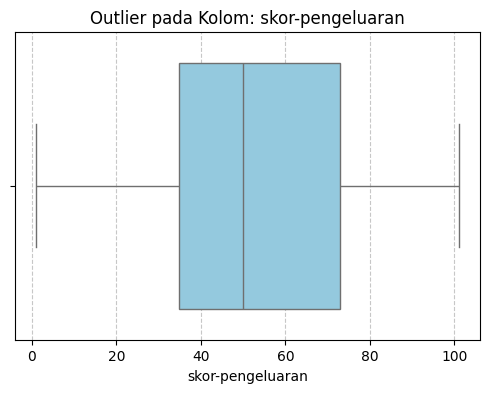

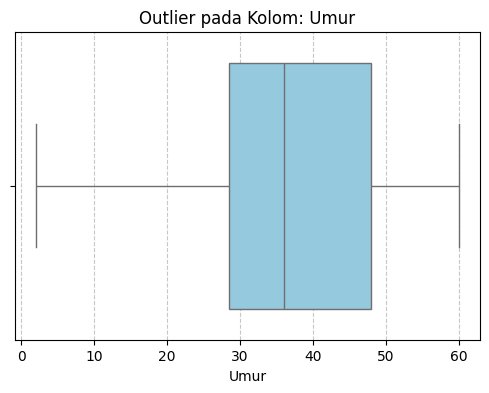

In [ ]:
for kolom in kolom_outlier:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[kolom], color='skyblue')
    plt.title(f"Outlier pada Kolom: {kolom}", fontsize=12)
    plt.xlabel(kolom)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

Dari hasil deteksi outlier menggunakan metode IQR dan visualisasi boxplot, dapat disimpulkan bahwa: Data secara umum bersih dan terdistribusi normal, tanpa banyak nilai ekstrem. Hanya kolom Pendapatan-per-bulan yang memiliki dua outlier dengan nilai sangat tinggi (Rp 50.000.000), Namun ditemukan indikasi noise pada variabel Umur dan Skor Pengeluaran.

In [ ]:
# mendeteksi adanya noise

# Cek jumlah data yang berada di luar rentang valid (1–100)
noise_data = data[(data['skor-pengeluaran'] < 1) | (data['skor-pengeluaran'] > 100)]

# Tampilkan jumlah dan data yang terdeteksi noise
print("Jumlah data noise pada 'skor-pengeluaran':", len(noise_data))
display(noise_data)

# Cek data dengan umur tidak wajar (misalnya < 15 tahun)
umur_noise = data[(data['Umur'] < 15) ]

# Tampilkan jumlah dan data yang terdeteksi noise
print("Jumlah data noise pada 'Umur':", len(umur_noise))
display(umur_noise)

Jumlah data noise pada 'skor-pengeluaran': 1


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
126,227,Wanita,47.0,18442622,101,NaN,Jakarta,2.0,Minggu,7


Jumlah data noise pada 'Umur': 1


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2.0,18032786,41,0,Jakarta,2.0,Senin,0


 Berdasarkan hasil, diketahui bahwa variabel **skor-pengeluaran** mengandung *noise*, yaitu terdapat satu nilai sebesar **101**, padahal rentang skor yang valid seharusnya hanya antara **1 hingga 100** dan dari hasil pengecekan variabel Umur, ditemukan adanya indikasi noise, yaitu terdapat data dengan umur 2 tahun namun memiliki penghasilan.


In [ ]:
# mendeteksi value counts untuk kolom kategori
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'HariFav', 'FavFlavor', 'Promo']

for kolom in kolom_kategorik:
    print(f"\n📊 Value Counts untuk kolom: {kolom}")
    print(data[kolom].value_counts(dropna=False))



📊 Value Counts untuk kolom: Jenis Kelamin
Jenis Kelamin
Wanita    109
Pria       86
NaN         4
-           1
Name: count, dtype: int64

📊 Value Counts untuk kolom: Menikah
Menikah
1      160
0       26
NaN     12
         1
-        1
Name: count, dtype: int64

📊 Value Counts untuk kolom: Kota
Kota
Jakarta      87
Depok        59
Tangerang    53
JJakarta      1
Name: count, dtype: int64

📊 Value Counts untuk kolom: HariFav
HariFav
Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Rabu       5
Jumat      5
Name: count, dtype: int64

📊 Value Counts untuk kolom: FavFlavor
FavFlavor
0    40
2    20
6    20
3    20
7    20
5    20
1    20
4    20
8    19
9     1
Name: count, dtype: int64

📊 Value Counts untuk kolom: Promo
Promo
1.0    86
3.0    50
2.0    43
0.0    14
NaN     6
5.0     1
Name: count, dtype: int64


Kesimpulan Keseluruhan dari Analisis Value Counts
1. Jenis Kelamin
- Mayoritas responden adalah Wanita (109 orang), sedangkan Pria sebanyak 86 orang.
- Terdapat data tidak valid atau hilang (NaN, ‘-’) sebanyak 5 entri, yang perlu dibersihkan atau diperbaiki.

2. Status Menikah
- Sebagian besar responden sudah menikah (160 orang), sedangkan belum menikah sebanyak 26 orang.
- Ada 14 data tidak valid atau kosong (NaN, ‘ ’, ‘-’) yang juga perlu dikoreksi.

3. Kota
- Mayoritas responden berasal dari Jakarta (87 orang), diikuti Depok (59) dan Tangerang (53).
- Terdapat satu kesalahan input “JJakarta” yang kemungkinan seharusnya “Jakarta” dan perlu diperbaiki.

4. Hari Favorit
- Senin (66 orang) menjadi hari favorit terbanyak, diikuti Sabtu (54) dan Minggu (43).
- Hari dengan peminat paling sedikit adalah Rabu dan Jumat (masing-masing 5 orang).

5. Rasa Favorit (FavFlavor)
- Distribusi preferensi rasa cukup merata di antara kode 0–8.
- Namun, terdapat kode 9 dengan hanya 1 data, yang bisa dianggap noise atau data tidak umum dan perlu dicek kevalidannya.

5. Promo
- Terdapat kode 5 dengan hanya 1 data, yang bisa dianggap noise atau data tidak umum dan perlu dicek kevalidannya.

## **3. MEMBERSIHKAN DATASET (DATA CLEANING/PREPROCESSING)**

### **A. MENANGANI MISSING VALUE**

In [ ]:
# Menangani missing value

import numpy as np

# Mengganti tanda "-" dan nilai kosong ("") menjadi NaN di seluruh kolom
data.replace(["-", "", '', ' ', ' '], np.nan, inplace=True)

data['Jenis Kelamin'] = data['Jenis Kelamin'].fillna(data['Jenis Kelamin'].mode()[0])
data['Menikah'] = data['Menikah'].fillna(data['Menikah'].mode()[0])
data['Promo'] = data['Promo'].fillna(data['Promo'].mode()[0])

print("Jumlah Missing Value Setelah Penanganan:\n")
print(data.isnull().sum())

Jumlah Missing Value Setelah Penanganan:

ID                      0
Jenis Kelamin           0
Umur                    1
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64


Hampir seluruh kolom sudah bebas dari missing value, kecuali kolom "Umur" yang masih memiliki 1 data kosong.

In [ ]:
# cek missing umur dengan median
data['Umur'].fillna(data['Umur'].median(), inplace=True)

/tmp/ipython-input-3843293723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Umur'].fillna(data['Umur'].median(), inplace=True)


In [ ]:
# Mengecek apakah kolom 'Umur' masih memiliki missing value
missing_umur = data['Umur'].isnull().sum()

if missing_umur == 0:
    print(" Kolom 'Umur' sudah bersih — tidak ada missing value.")
else:
    print(f"⚠️ Kolom 'Umur' masih memiliki {missing_umur} missing value.")


 Kolom 'Umur' sudah bersih — tidak ada missing value.


Kolom “Umur” sudah bersih dan tidak memiliki missing value, karena hasil pengecekan menunjukkan nilai 0 untuk jumlah data yang hilang.

In [ ]:
# cek kembali value counts variable kategorik
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'HariFav', 'FavFlavor', 'Promo']

for kolom in kolom_kategorik:
    print(f"\n📊 Value Counts untuk kolom: {kolom}")
    print(data[kolom].value_counts(dropna=False))


📊 Value Counts untuk kolom: Jenis Kelamin
Jenis Kelamin
Wanita    114
Pria       86
Name: count, dtype: int64

📊 Value Counts untuk kolom: Menikah
Menikah
1    174
0     26
Name: count, dtype: int64

📊 Value Counts untuk kolom: Kota
Kota
Jakarta      87
Depok        59
Tangerang    53
JJakarta      1
Name: count, dtype: int64

📊 Value Counts untuk kolom: HariFav
HariFav
Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Rabu       5
Jumat      5
Name: count, dtype: int64

📊 Value Counts untuk kolom: FavFlavor
FavFlavor
0    40
2    20
6    20
3    20
7    20
5    20
1    20
4    20
8    19
9     1
Name: count, dtype: int64

📊 Value Counts untuk kolom: Promo
Promo
1.0    92
3.0    50
2.0    43
0.0    14
5.0     1
Name: count, dtype: int64


Dapat disimpulkan bahwa mayoritas responden adalah **wanita (114 orang)** yang **sudah menikah (174 orang)** dan berasal dari Jakarta (87 orang). Hari yang paling disukai adalah **Senin (66 orang)**, Rasa favorit terbanyak adalah kategori **0 (40 orang)**, dan promo yang paling diminati adalah **promo 1.0 (92 orang)** Terdapat sedikit ketidakkonsistenan data pada kolom Kota (“JJakarta” sebanyak 1 data) yang perlu diperbaiki.

### **B. MENANGANI OUTLIER DAN NOISE**

In [ ]:
# menangani noise

# Ubah nilai 101 menjadi 100 pada variabel skor-pengeluaran
data.loc[data['skor-pengeluaran'] > 100, 'skor-pengeluaran'] = 100

# Ubah nilai 5 menjadi 4 pada variabel Promo
data.loc[data['Promo'] > 4, 'Promo'] = 4

# Mengganti nilai Umur = 2 menjadi 20
data.loc[data['Umur'] == 2, 'Umur'] = 20

# Hapus baris dengan nilai FavFlavor = 9
data = data[data['FavFlavor'] <= 8]

- Pada variabel skor-pengeluaran, terdapat satu nilai 101 di luar rentang valid 1–100. Karena variabel ini bersifat kategorikal ordinal dan Karena selisihnya kecil dan diduga kesalahan input, nilai tersebut dikoreksi menjadi 100.

- Pada variabel Promo, ditemukan nilai 5, sedangkan kategori valid hanya 1–4. Nilai tersebut disesuaikan menjadi 4 sebagai kategori terdekat yang paling logis.Karena variabel ini bersifat kategorikal ordinal.

- Sementara itu, variabel FavFlavor memiliki nilai 9 di luar rentang 1–8, Karena variabel ini bersifat kategorikal nominal, maka baris data tersebut dihapus untuk menjaga validitas data.

In [ ]:
# menangani outlier

# Definisikan kolom target
kolom = 'Pendapatan-per-bulan'

# Hitung Q1, Q3, dan IQR
Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Winsorizing
data[kolom] = np.where(data[kolom] > batas_atas, batas_atas,
                       np.where(data[kolom] < batas_bawah, batas_bawah, data[kolom]))


/tmp/ipython-input-3466838406.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom] = np.where(data[kolom] > batas_atas, batas_atas,


Dari hasil deteksi outlier, kolom Pendapatan-per-bulan yang memiliki dua outlier, maka dilakukan Winsorizing, yaitu mengganti nilai outlier pada kolom Pendapatan-per-bulan dengan nilai batas atas IQR agar distribusi data tetap seimbang tanpa menghapus observasi. Langkah ini dipilih agar informasi pada data tidak hilang.

### **C. MENSTANDARKAN FORMAT DATA**

Dari data diatas dapat disimpulkan tipe data yang perlu diperbaiki:
1. Jenis Kelamin → ubah ke category
2. Umur → ubah ke int64
3. Menikah → ubah ke category
4. Kota → ubah ke category
5. HariFav → ubah ke category



In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].astype('category')
data['Umur'] = pd.to_numeric(data['Umur'], errors='coerce').astype('Int64')
data['Menikah'] = data['Menikah'].astype('category')
data['Kota'] = data['Kota'].astype('category')
data['HariFav'] = data['HariFav'].astype('category')
data['Promo'] = data['Promo'].astype('category')
data['FavFlavor'] = data['FavFlavor'].astype('category')

print("✅ Tipe data setelah konversi:\n")
print(data.info())

✅ Tipe data setelah konversi:

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    199 non-null    int64   
 1   Jenis Kelamin         199 non-null    category
 2   Umur                  199 non-null    Int64   
 3   Pendapatan-per-bulan  199 non-null    float64 
 4   skor-pengeluaran      199 non-null    int64   
 5   Menikah               199 non-null    category
 6   Kota                  199 non-null    category
 7   Promo                 199 non-null    category
 8   HariFav               199 non-null    category
 9   FavFlavor             199 non-null    category
dtypes: Int64(1), category(6), float64(1), int64(2)
memory usage: 10.5 KB
None


/tmp/ipython-input-1877849829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Jenis Kelamin'] = data['Jenis Kelamin'].astype('category')
/tmp/ipython-input-1877849829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Umur'] = pd.to_numeric(data['Umur'], errors='coerce').astype('Int64')
/tmp/ipython-input-1877849829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Setelah dilakukan konversi tipe data, struktur dataset kini telah sesuai dengan karakteristik masing-masing kolom.

### **D. NORMALISASI DAN STANDARISASI**

In [ ]:
# Standarisasi nilai kategorikal pada variabel 'Kota'
data['Kota'] = data['Kota'].replace({
    'JJakarta': 'Jakarta',
})

data['Kota'].value_counts()


/tmp/ipython-input-3553535699.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Kota'] = data['Kota'].replace({
/tmp/ipython-input-3553535699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kota'] = data['Kota'].replace({


,count
Kota,
Jakarta,88
Depok,59
Tangerang,52


dapat disimpulkan bahwa setelah dilakukan perbaikan data pada kolom “Kota”, jumlah data menjadi:

Jakarta: 88 orang

Depok: 59 orang

Tangerang: 52 orang

Artinya, data tidak lagi memiliki entri tidak konsisten seperti “JJakarta”, dan kini kolom “Kota” sudah bersih serta terstandarisasi.

In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik yang akan dinormalisasi
numerical_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan Min-Max Scaling langsung pada data asli
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Cek hasilnya
print(data[numerical_cols].describe())


             Umur  Pendapatan-per-bulan  skor-pengeluaran
count  199.000000            199.000000        199.000000
mean     0.462312              0.383436          0.501193
std      0.281222              0.221105          0.262998
min      0.000000              0.000000          0.000000
25%      0.250000              0.219409          0.343434
50%      0.428571              0.388186          0.494949
75%      0.714286              0.531646          0.727273
max      1.000000              1.000000          1.000000


/tmp/ipython-input-3591072903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Normalisasi dilakukan menggunakan metode Min-Max Scaling karena terdapat perbedaan rentang nilai antar variabel, khususnya pada variabel *Pendapatan-per-bulan* yang memiliki skala jauh lebih besar dibanding variabel lain. Normalisasi ini memastikan seluruh fitur berada dalam rentang yang sebanding (0–1), sehingga tidak ada variabel yang mendominasi proses pemodelan.



### **E. ENCODING VARIABLE KATEGORIKAL**

In [ ]:
# Label Encoding (untuk variabel ordinal)

from sklearn.preprocessing import LabelEncoder

# Label encoding untuk variabel ordinal
le = LabelEncoder()
data['Promo'] = le.fit_transform(data['Promo'])


/tmp/ipython-input-1213008013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Promo'] = le.fit_transform(data['Promo'])


In [ ]:
# One-Hot Encoding (untuk variabel nominal)

data = pd.get_dummies(
    data,
    columns=[ 'Kota', 'HariFav', 'FavFlavor'],
    drop_first=False  # drop_first untuk menghindari multikolinearitas
)


In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'Pria': 1, 'Wanita': 0})

### **F. FEATURE SELECTION**

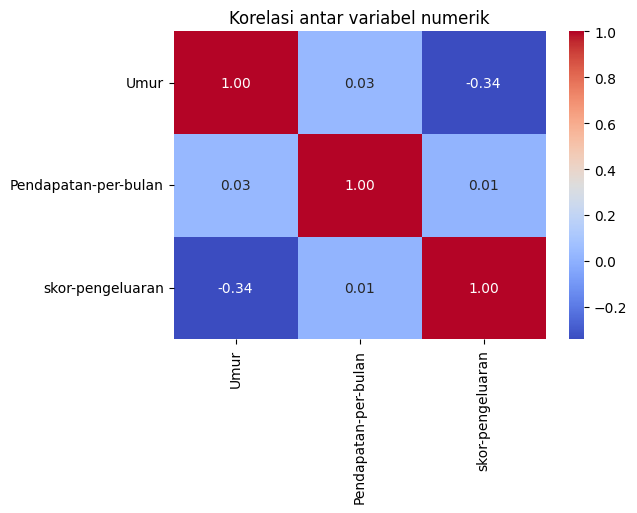

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat korelasi antar variabel numerik
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Hitung matriks korelasi
corr = data[kolom_numerik].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar variabel numerik")
plt.show()



Hasil analisis korelasi menunjukkan bahwa hubungan antar variabel numerik (`Umur`, `Pendapatan-per-bulan`, dan `skor-pengeluaran`) tergolong lemah. Tidak terdapat korelasi kuat atau multikolinearitas antar variabel, sehingga seluruh variabel masih dapat digunakan pada tahap pemodelan selanjutnya.


In [ ]:
# menghapus variable "ID"
data.drop(columns=['ID'], inplace=True)

Variabel seperti ID dihapus,
karena bukan fitur yang relevan untuk analisis atau pemodelan.

### **G. FEATURE ENGINEERING**

In [ ]:
# Kategori umur
bins = [0, 0.3, 0.7, 1.0]
labels = ['Muda', 'Dewasa', 'Tua']
data['Kategori_Umur'] = pd.cut(data['Umur'], bins=bins, labels=labels, right=False)

# Rasio pengeluaran terhadap pendapatan
data['Rasio_Pengeluaran'] = data['skor-pengeluaran'] / (data['Pendapatan-per-bulan'] + 1e-6)

# Interaksi pendapatan dan umur (hasil scaling)
data['Pendapatan_per_Umur'] = data['Pendapatan-per-bulan'] / (data['Umur'] + 1e-6)

# Melihat hasil
data_fiks = data.copy()
data_fiks.head()


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,Kota_Depok,Kota_Jakarta,Kota_Tangerang,HariFav_Jumat,...,FavFlavor_2,FavFlavor_3,FavFlavor_4,FavFlavor_5,FavFlavor_6,FavFlavor_7,FavFlavor_8,Kategori_Umur,Rasio_Pengeluaran,Pendapatan_per_Umur
0,0,0.738095,0.270042,0.515152,1,1,False,True,False,False,...,True,False,False,False,False,False,False,Tua,1.907663,0.365863
1,0,0.333333,0.691983,0.858586,1,1,True,False,False,False,...,False,False,False,False,True,False,False,Dewasa,1.240760,2.075943
2,1,0.785714,0.329114,0.404040,1,2,False,True,False,False,...,False,True,False,False,False,False,False,Tua,1.227658,0.418872
3,1,0.023810,0.261603,0.545455,0,1,False,True,False,False,...,False,False,False,False,False,True,False,Muda,2.085036,10.986880
4,0,0.476190,0.413502,0.414141,1,2,False,True,False,False,...,False,False,False,False,False,False,True,Dewasa,1.001544,0.868353


Dataset sekarang sudah bersih dan rapi, serta memiliki fitur tambahan yang membantu memahami data responden dengan lebih baik — khususnya dalam hal usia, pendapatan, dan pengeluaran.

In [ ]:
data_fiks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         199 non-null    category
 1   Umur                  199 non-null    float64 
 2   Pendapatan-per-bulan  199 non-null    float64 
 3   skor-pengeluaran      199 non-null    float64 
 4   Menikah               199 non-null    category
 5   Promo                 199 non-null    int64   
 6   Kota_Depok            199 non-null    bool    
 7   Kota_Jakarta          199 non-null    bool    
 8   Kota_Tangerang        199 non-null    bool    
 9   HariFav_Jumat         199 non-null    bool    
 10  HariFav_Kamis         199 non-null    bool    
 11  HariFav_Minggu        199 non-null    bool    
 12  HariFav_Rabu          199 non-null    bool    
 13  HariFav_Sabtu         199 non-null    bool    
 14  HariFav_Selasa        199 non-null    bool    
 15  HariFav_Sen

## **5. ESKPLORASI DAN VISUALISASI (DATA EXPLORATION)**

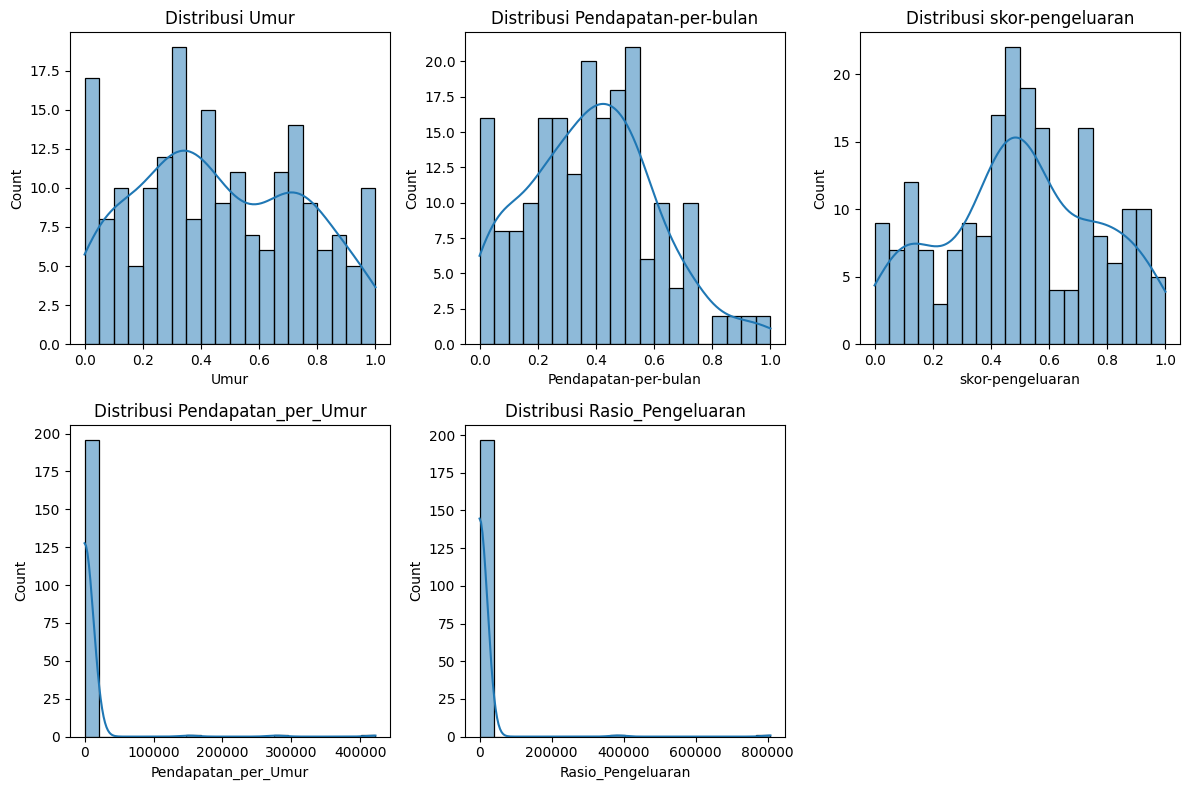

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
            'Pendapatan_per_Umur', 'Rasio_Pengeluaran']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


Secara keseluruhan, hasil analisis distribusi data menunjukkan bahwa:
Mayoritas responden memiliki pendapatan dan pengeluaran pada tingkat sedang hingga rendah, sementara hanya sedikit yang memiliki nilai tinggi. Sebaran umur cukup merata, menunjukkan keberagaman usia responden. Namun, pada variabel Pendapatan per Umur dan Rasio Pengeluaran terhadap Pendapatan terlihat adanya outlier, yang mengindikasikan adanya perbedaan signifikan dalam kemampuan finansial antarresponden.

Dengan demikian, dapat disimpulkan bahwa data menggambarkan populasi yang beragam secara usia, namun secara ekonomi didominasi oleh kelompok berpendapatan menengah ke bawah dengan sebagian kecil individu berpenghasilan jauh lebih tinggi.

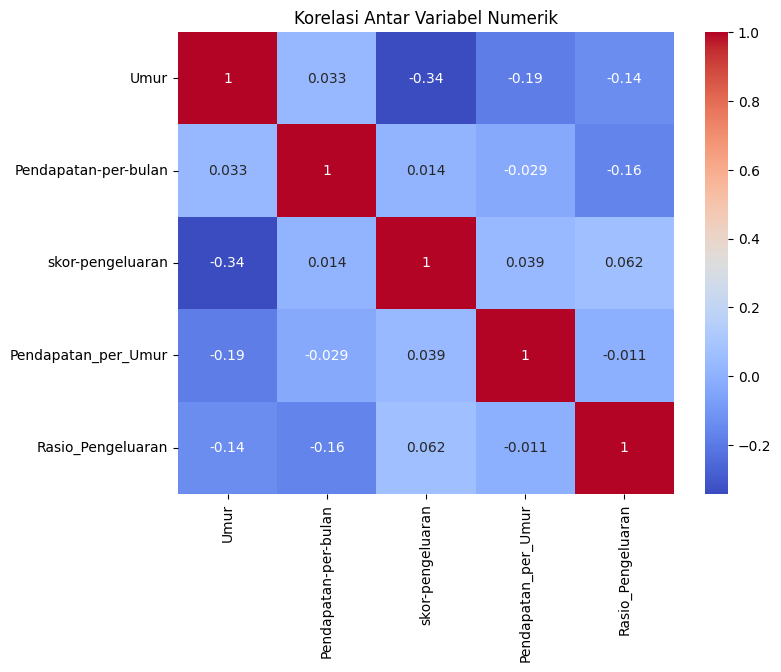

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


Secara keseluruhan, hasil analisis korelasi menunjukkan bahwa hubungan antar variabel numerik dalam dataset tergolong lemah, kecuali antara Umur dan Skor Pengeluaran yang memiliki korelasi negatif sedang (-0.34). Artinya, semakin bertambah umur responden, kecenderungan untuk melakukan pengeluaran besar semakin menurun. Sementara itu, variabel lainnya seperti Pendapatan, Pendapatan per Umur, dan Rasio Pengeluaran tidak menunjukkan hubungan linear yang signifikan, sehingga dapat disimpulkan bahwa tidak ada multikolinearitas di antara variabel numerik tersebut.

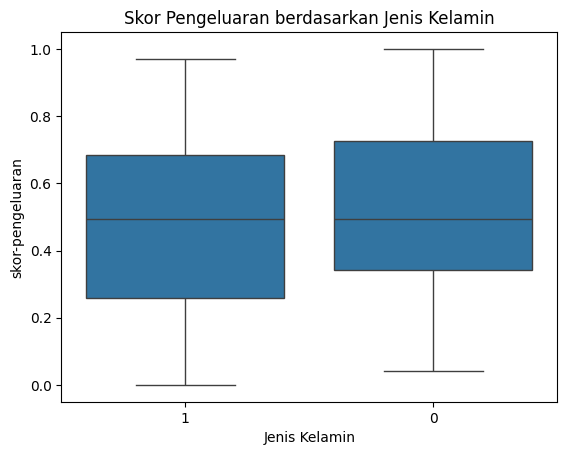

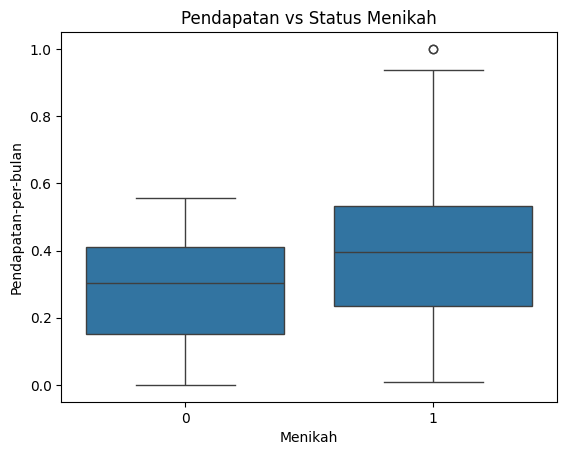

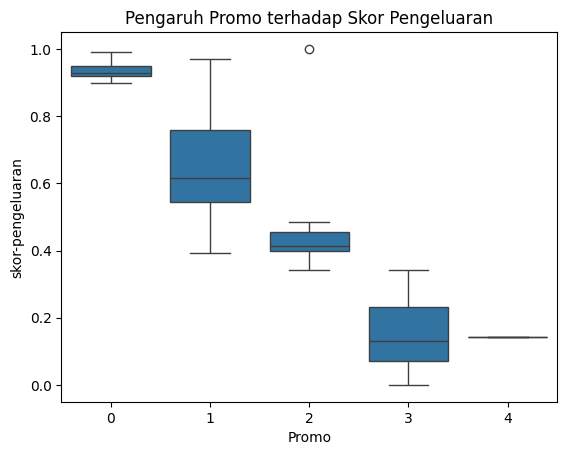

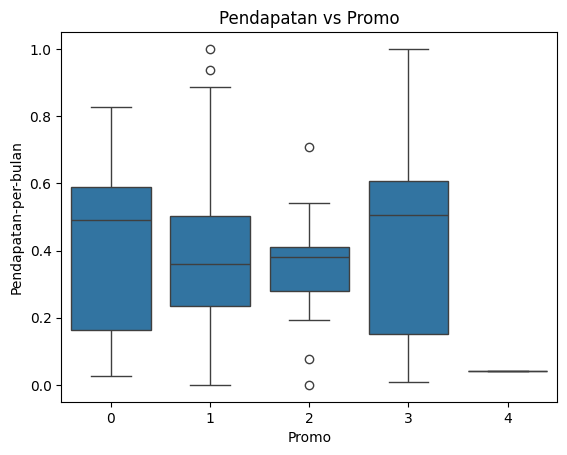

In [ ]:
sns.boxplot(x='Jenis Kelamin', y='skor-pengeluaran', data=data)
plt.title('Skor Pengeluaran berdasarkan Jenis Kelamin')
plt.show()

sns.boxplot(x='Menikah', y='Pendapatan-per-bulan', data=data)
plt.title('Pendapatan vs Status Menikah')
plt.show()

sns.boxplot(x='Promo', y='skor-pengeluaran', data=data)
plt.title('Pengaruh Promo terhadap Skor Pengeluaran')
plt.show()

sns.boxplot(x='Promo', y='Pendapatan-per-bulan', data=data)
plt.title('Pendapatan vs Promo')
plt.show()


  
Secara keseluruhan, hasil analisis boxplot menunjukkan bahwa status pernikahan memiliki pengaruh terhadap pendapatan, di mana responden menikah cenderung berpenghasilan lebih tinggi. Sementara itu, jenis kelamin dan tingkat promo tidak menunjukkan pengaruh signifikan terhadap pengeluaran maupun pendapatan. Selain itu, tingkat promo yang lebih tinggi justru cenderung menurunkan skor pengeluaran, menandakan perilaku konsumen yang lebih hemat.

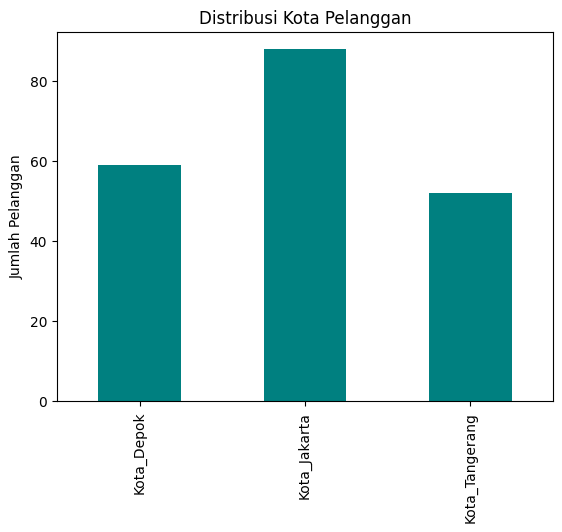

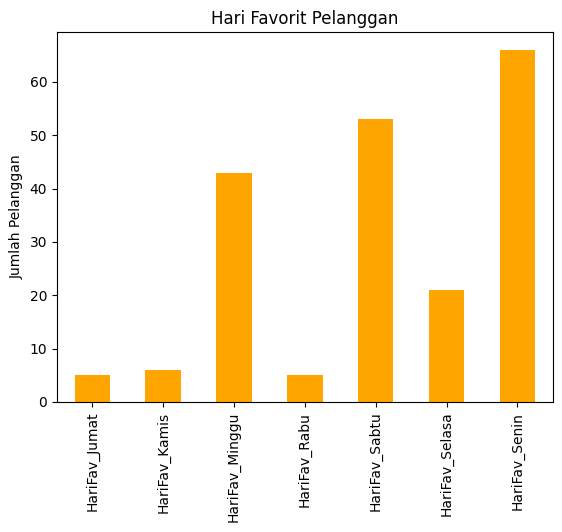

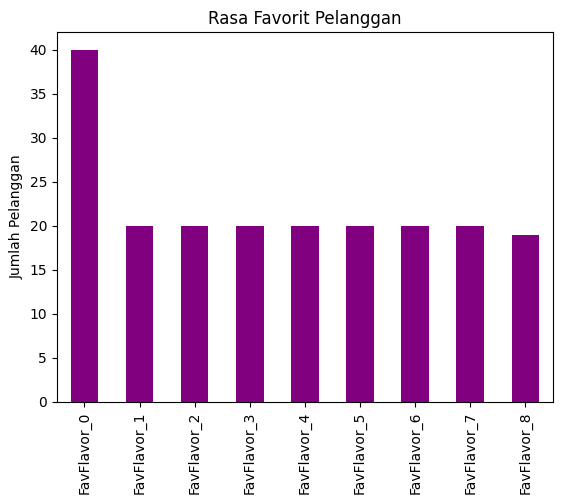

In [ ]:
cat_cols = ['Kota_Depok', 'Kota_Jakarta', 'Kota_Tangerang']
flavor_cols = [col for col in data.columns if 'FavFlavor' in col]
hari_cols = [col for col in data.columns if 'HariFav' in col]

# Kota
data[cat_cols].sum().plot(kind='bar', color='teal')
plt.title('Distribusi Kota Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Hari Favorit
data[hari_cols].sum().plot(kind='bar', color='orange')
plt.title('Hari Favorit Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Rasa Favorit
data[flavor_cols].sum().plot(kind='bar', color='purple')
plt.title('Rasa Favorit Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


Hasil analisis menunjukkan bahwa mayoritas pelanggan berasal dari Kota Jakarta, dengan hari pembelian tertinggi terjadi pada hari Senin serta rasa favorit pelanggan adalah FavFlavor_0. Hal ini mengindikasikan bahwa Jakarta merupakan pasar utama, aktivitas pembelian paling aktif di awal minggu, dan rasa FavFlavor_0 menjadi produk paling diminati sehingga layak dijadikan fokus promosi dan penjualan utama

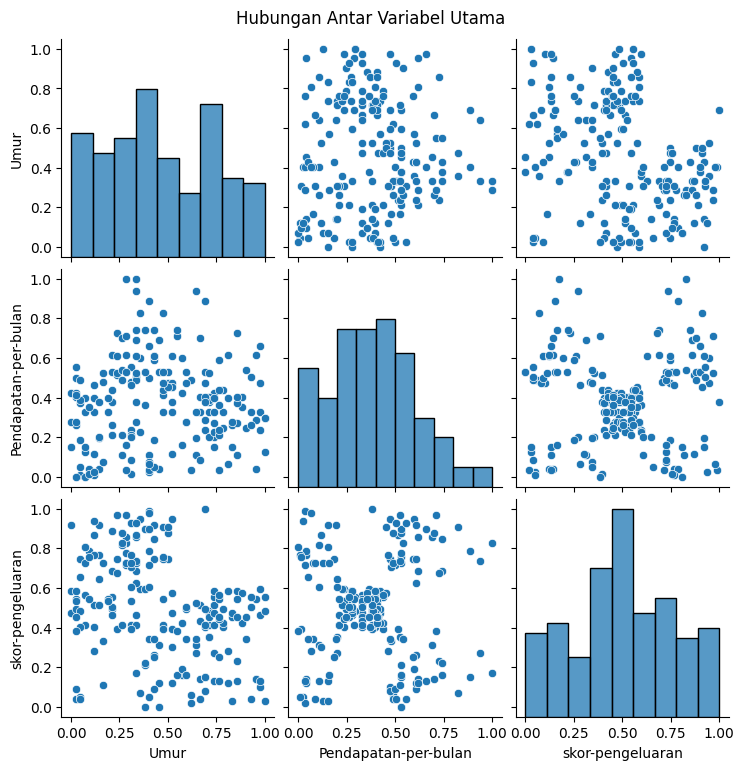

In [ ]:
sns.pairplot(data_fiks[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']])
plt.suptitle('Hubungan Antar Variabel Utama', y=1.02)
plt.show()

Berdasarkan grafik pairplot di atas, dapat disimpulkan bahwa:

Hubungan antar variabel numerik (Umur, Pendapatan-per-bulan, dan Skor-pengeluaran) terlihat lemah dan tersebar acak, menandakan tidak ada korelasi linear yang kuat di antara ketiganya.

Umur dan Skor Pengeluaran menunjukkan sedikit kecenderungan negatif — semakin tua responden, pengeluaran cenderung menurun.

Distribusi masing-masing variabel juga cukup merata tanpa adanya pola yang mencolok, menunjukkan keberagaman karakteristik responden.

Secara keseluruhan, hubungan antar variabel utama bersifat lemah, sehingga masing-masing variabel dapat dianalisis secara independen dalam pemodelan selanjutnya.

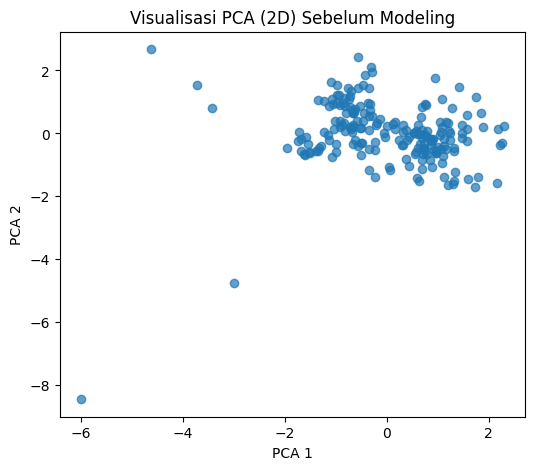

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(data_fiks[num_cols])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title('Visualisasi PCA (2D) Sebelum Modeling')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Secara keseluruhan, hasil visualisasi PCA (2D) sebelum modeling menunjukkan bahwa data memiliki pola yang cukup terkelompok dengan beberapa titik yang menyimpang jauh (outlier), menandakan bahwa sebagian besar data memiliki kemiripan karakteristik

#**CLUSTERING**

In [ ]:
data.to_csv('data_clean.csv', index=False)

##**Pemodelan & Validasi**


##**A. ELBOW METHOD**

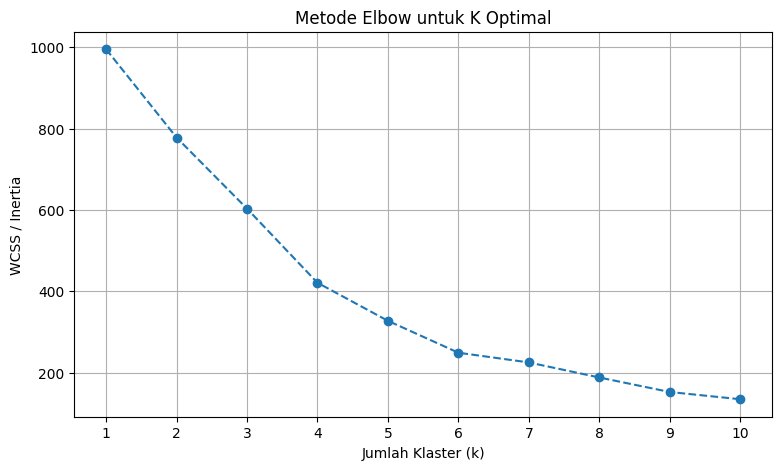

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Hitung Inertia (WCSS) untuk k yang berbeda
wcss = []
k_range = range(1, 11)

# Ensure X_scaled is defined - assuming num_cols and data_fiks are available
if 'X_scaled' not in locals():
    # If X_scaled is not defined, recreate it from data_fiks and num_cols
    num_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
                'Pendapatan_per_Umur', 'Rasio_Pengeluaran'] # Define num_cols if not in scope
    # Assuming data_fiks is the final processed dataframe
    if 'data_fiks' in locals():
        X = data_fiks[num_cols]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        print("Error: data_fiks not found. Cannot create X_scaled.")


if 'X_scaled' in locals():
    for i in k_range:
        # Menggunakan K-Means++ untuk hasil yang stabil
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        max_iter=300, n_init=10, random_state=42)
        # Use X_scaled instead of X
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # 2. Visualisasi Grafik Elbow
    plt.figure(figsize=(9, 5))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Metode Elbow untuk K Optimal')
    plt.xlabel('Jumlah Klaster (k)')
    plt.ylabel('WCSS / Inertia')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("WCSS calculation skipped due to missing X_scaled.")

Analisis awal untuk menentukan jumlah klaster yang optimal ($k$) dilakukan menggunakan Metode Elbow pada metrik WCSS (Within-Cluster Sum of Squares).

Dari grafik, terlihat adanya penurunan tajam nilai WCSS dari $k=1$ hingga $\mathbf{k=4}$, setelah itu kurva menjadi lebih landai dan penurunan signifikansi berkurang.

Berdasarkan prinsip heuristik ini, kami menyimpulkan bahwa $\mathbf{k=4}$ adalah hipotesis awal untuk jumlah klaster yang optimal.

Namun, karena Metode Elbow hanya mengukur kekompakan internal klaster, kesimpulan ini perlu divalidasi dengan metrik yang lebih kuat, yaitu Silhouette Score, yang juga mempertimbangkan pemisahan antar klaster, sebelum model clustering akhir dibuat.

##**B. SILHOUETTE SCORE**

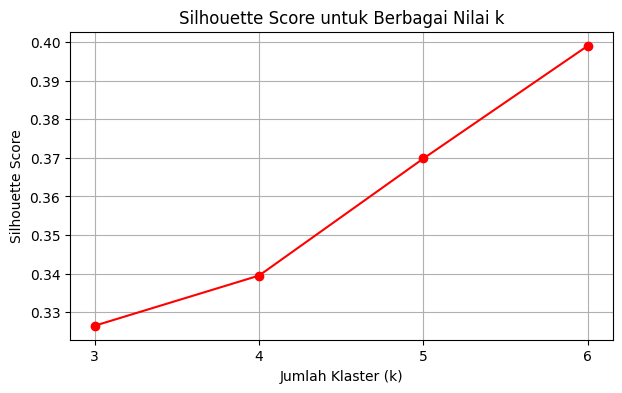


Silhouette Scores:
k=3: 0.3265
k=4: 0.3395
k=5: 0.3699
k=6: 0.3991


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Import StandardScaler here

# X is your scaled and preprocessed data
# We test k around the elbow point (3, 4, 5, 6)
k_to_test = range(3, 7)
silhouette_scores = []

# Ensure X_scaled is defined - assuming num_cols and data_fiks are available
if 'X_scaled' not in locals():
    # If X_scaled is not defined, recreate it from data_fiks and num_cols
    num_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
                'Pendapatan_per_Umur', 'Rasio_Pengeluaran'] # Define num_cols if not in scope
    # Assuming data_fiks is the final processed dataframe
    if 'data_fiks' in locals():
        X = data_fiks[num_cols]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        print("Error: data_fiks not found. Cannot create X_scaled.")


if 'X_scaled' in locals():
    for k in k_to_test:
        # Menggunakan K-Means++ (penting untuk mendapatkan skor yang stabil)
        kmeans = KMeans(n_clusters=k, init='k-means++',
                        max_iter=300, n_init=10, random_state=42)
        # Use X_scaled instead of X
        kmeans.fit(X_scaled)

        # Hitung Silhouette Score
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    # Visualisasi Skor Silhouette
    plt.figure(figsize=(7, 4))
    plt.plot(k_to_test, silhouette_scores, marker='o', linestyle='-', color='red')
    plt.title('Silhouette Score untuk Berbagai Nilai k')
    plt.xlabel('Jumlah Klaster (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_to_test)
    plt.grid(True)
    plt.show()

    # Menampilkan hasil numerik
    print("\nSilhouette Scores:")
    for k, score in zip(k_to_test, silhouette_scores):
        print(f"k={k}: {score:.4f}")
else:
    print("Silhouette score calculation skipped due to missing X_scaled.")

Validasi model clustering menggunakan Silhouette Score adalah tahapan evaluasi yang mengukuhkan jumlah klaster optimal ($k$).

Meskipun Metode Elbow secara visual menyarankan $k=4$ sebagai hipotesis awal untuk mencapai kekompakan data yang baik, analisis Silhouette Score menunjukkan bahwa pemisahan klaster terbaik tercapai pada $\mathbf{k=6}$.

Dengan skor tertinggi $\mathbf{0.3991}$ pada $k=6$ (melampaui $k=4$ yang hanya $0.3395$), bukti statistik mengindikasikan bahwa membagi data menjadi enam segmen menghasilkan model yang lebih padat dan lebih terpisah.

Oleh karena itu, kami mengabaikan $k=4$ dan menetapkan $\mathbf{k=6}$ sebagai jumlah klaster optimal untuk pemodelan K-Means++ final, yang akan memberikan insight yang lebih tajam dan terperinci.

##**C. GRAFIK DISTRIBUSI KLASTER**

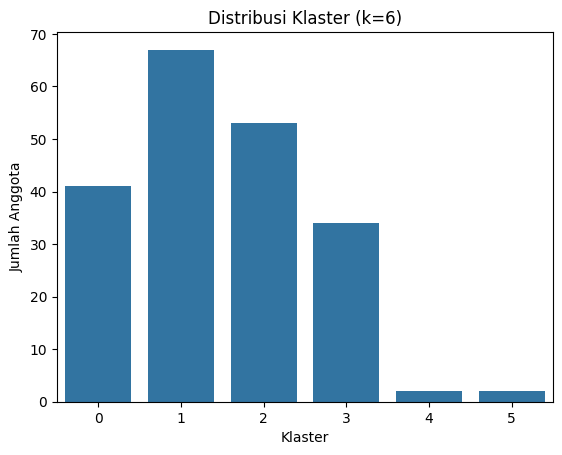

Labels Klaster (10 data pertama):
[1 0 1 2 1 0 2 2 2 2]


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

k=6
kmPP = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmPP.fit(X_scaled)
C_kmpp = kmPP.predict(X_scaled)

sns.countplot(x=C_kmpp)
plt.title('Distribusi Klaster (k=6)')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Anggota')
plt.show()

print("Labels Klaster (10 data pertama):")
print(C_kmpp[:10])

Grafik Distribusi Klaster menunjukkan bahwa jumlah anggota dalam 6 segmen yang terbentuk sangat tidak merata.

Klaster 1 adalah yang terbesar dengan sekitar 67 anggota, diikuti oleh Klaster 2 (sekitar 53 anggota). Sebaliknya, Klaster 4 dan Klaster 5 adalah segmen yang paling kecil (terdiri dari sekitar 2-3 anggota).

Meskipun Klaster 4 dan 5 sangat kecil—yang mungkin mengindikasikan outlier atau segmen niche yang ekstrem—keunikan profil mereka yang tinggi (misalnya, Klaster 5 Pria Muda Super Konsumtif) memvalidasi bahwa mereka adalah segmen yang berbeda.

Disparitas ukuran ini menunjukkan bahwa sebagian besar upaya pemasaran harus difokuskan pada klaster yang lebih besar (0, 1, 2, 3), sementara klaster kecil dapat menjadi target untuk program VIP atau niche yang sangat spesifik.

##**D. VISUALISASI GRAFIK**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# K optimal DITETAPKAN BERDASARKAN SILHOUETTE SCORE (0.3991)
k_optimal = 6

# 1. Model final dengan k optimal (k=6) dan K-Means++
# Asumsikan X_scaled adalah data Anda yang sudah di-scaled/di-encode
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++',
                      max_iter=300, n_init=10, random_state=42)
kmeans_final.fit(X_scaled)

# 2. Mendapatkan Label Klaster
labels_final = kmeans_final.labels_

# 3. Menambahkan Label Klaster ke DataFrame Asli untuk Analisis Profil
# Asumsikan data_fiks adalah DataFrame asli yang sudah ditangani missing value
data_fiks['Cluster'] = labels_final

print(f"Pemodelan K-Means++ Final Berhasil Dibuat dengan k = {k_optimal}")

Pemodelan K-Means++ Final Berhasil Dibuat dengan k = 6


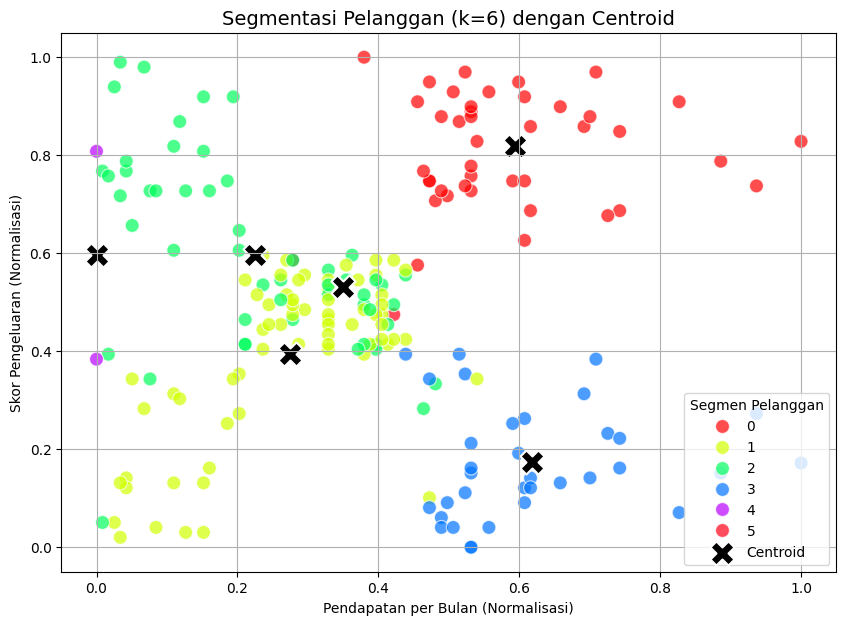

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Untuk menggunakan np.array

plt.figure(figsize=(10, 7))

# 1. Visualisasi Klaster (Titik Data)
sns.scatterplot(
    x='Pendapatan-per-bulan',
    y='skor-pengeluaran',
    hue='Cluster',
    data=data_fiks,
    palette='hsv', # Palet warna yang baik untuk 6 klaster
    s=100,
    alpha=0.7, # Sedikit transparan agar centroid lebih menonjol
    legend='full' # Pastikan legend penuh muncul
)

# 2. Visualisasi Centroid
# Centroid disimpan di kmeans_final.cluster_centers_
# Namun, centroid ini berada dalam ruang data yang sudah di-scaled (X_scaled)
# Kita perlu mengidentifikasi kolom yang sesuai untuk Pendapatan-per-bulan dan skor-pengeluaran di X_scaled

# Asumsi: Anda tahu indeks kolom Pendapatan-per-bulan dan skor-pengeluaran di X_scaled
# Ini adalah bagian tricky karena OneHotEncoder mengubah urutan dan jumlah kolom.
# Cara paling robust adalah dengan mengambil rata-rata klaster dari data_fiks['Cluster']
# pada kolom yang sudah di-scaled/dinormalisasi.

# Untuk mendapatkan centroid dalam skala asli (0-1) dari data_fiks:
# Pastikan 'Pendapatan-per-bulan' dan 'skor-pengeluaran' di data_fiks sudah dinormalisasi
# (jika Anda belum menyimpannya setelah normalisasi, Anda harus melakukan normalisasi dulu pada data_fiks)
# Mari kita asumsikan 'Pendapatan-per-bulan' dan 'skor-pengeluaran' di data_fiks sudah dalam skala 0-1.

# Hitung centroid rata-rata dari data_fiks yang sudah dilabeli
centroids_df = data_fiks.groupby('Cluster')[['Pendapatan-per-bulan', 'skor-pengeluaran']].mean().reset_index()

# Plot centroid
plt.scatter(
    centroids_df['Pendapatan-per-bulan'],
    centroids_df['skor-pengeluaran'],
    marker='X', # Centroid akan ditandai dengan 'X'
    s=300,      # Ukuran centroid yang lebih besar
    color='black', # Warna hitam agar menonjol
    edgecolors='white', # Tambahkan garis putih agar lebih jelas
    linewidth=1.5,
    label='Centroid' # Beri label untuk legend
)

plt.title('Segmentasi Pelanggan (k=6) dengan Centroid', fontsize=14)
plt.xlabel('Pendapatan per Bulan (Normalisasi)')
plt.ylabel('Skor Pengeluaran (Normalisasi)')

# Custom legend untuk memisahkan klaster dan centroid
handles, labels = plt.gca().get_legend_handles_labels()
# Pisahkan handles dan labels untuk klaster dan centroid
cluster_handles = handles[:-1]
cluster_labels = labels[:-1]
centroid_handle = handles[-1]
centroid_label = labels[-1]

# Gabungkan menjadi satu legend, dengan centroid di paling bawah
plt.legend(cluster_handles + [centroid_handle], cluster_labels + [centroid_label],
           title='Segmen Pelanggan', loc='lower right')

plt.grid(True)
plt.show()


Interpretasi grafik Segmentasi Pelanggan: Pendapatan vs. Pengeluaran (k=6) menunjukkan adanya struktur data yang kuat yang membagi pelanggan menjadi beberapa kelompok daya beli dan perilaku.

Secara ringkas:

Pemisahan Ekstrem: Model berhasil memisahkan Klaster Merah (0) dan Klaster Biru (3) sebagai segmen utama dengan Pendapatan Tinggi, yang menunjukkan pembagian antara Pembelanja Aktif (Klaster 0, Skor Pengeluaran tinggi) dan Pelanggan Hemat (Klaster 3, Skor Pengeluaran rendah).

Zona Tumpang Tindih (Klaster 1 & 2): Area tengah grafik (Pendapatan/Pengeluaran Menengah-Rendah) terlihat sangat bercampur. Hal ini menunjukkan bahwa Pendapatan dan Pengeluaran bukanlah satu-satunya faktor pemisah; klaster-klaster ini (seperti Klaster 1 dan 2) dipisahkan oleh dimensi tersembunyi seperti Umur, Status Menikah, atau Jenis Kelamin.

Segmen Niche/Anomali: Klaster di sisi kiri bawah (terutama Klaster 4 dan 5) mewakili segmen dengan Pendapatan Sangat Rendah atau Nol tetapi menunjukkan perilaku pengeluaran yang beragam (mulai dari sangat hemat hingga impulsif), yang memerlukan perhatian khusus karena berpotensi menjadi outlier atau segmen niche berisiko.

Kesimpulannya, visualisasi ini memvalidasi adanya segmen pelanggan yang didorong oleh nilai (Pendapatan/Pengeluaran) dan menunjukkan perlunya mengacu pada analisis profil lengkap untuk sepenuhnya memahami perbedaan dalam zona tumpang tindih.

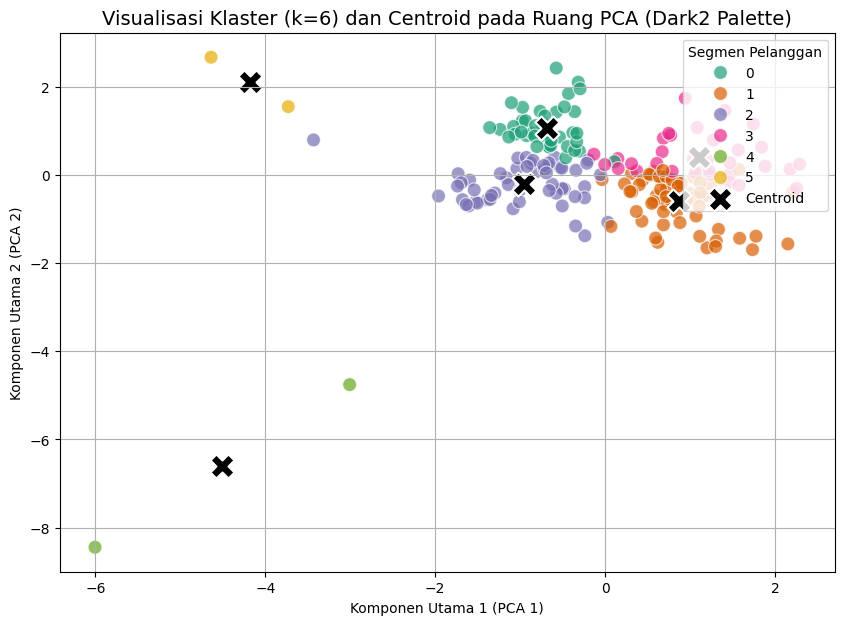

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# --- Asumsi X_pca, labels_final, dan kmeans_final sudah tersedia ---

# 1. Persiapan Data untuk Plot
df_pca = pd.DataFrame(data=X_pca[:, [0, 1]], columns=['PCA 1', 'PCA 2'])
df_pca['Cluster'] = labels_final

# 2. Mendapatkan Centroid di Ruang PCA (menggunakan rata-rata klaster pada koordinat PCA)
centroids_pca_df = df_pca.groupby('Cluster')[['PCA 1', 'PCA 2']].mean().reset_index()

# 3. Visualisasi
plt.figure(figsize=(10, 7))

# Plot Klaster (Titik Data)
sns.scatterplot(
    x='PCA 1',
    y='PCA 2',
    hue='Cluster',
    data=df_pca,
    palette='Dark2',  # DIGANTI: Menggunakan palet 'Dark2' untuk kontras 6 warna yang lebih baik
    s=100,
    alpha=0.7,
    legend='full'
)

# Plot Centroid (Titik Pusat Klaster di Ruang PCA)
plt.scatter(
    centroids_pca_df['PCA 1'],
    centroids_pca_df['PCA 2'],
    marker='X', # Centroid ditandai dengan 'X'
    s=300,      # Ukuran besar
    color='black',
    edgecolors='white',
    linewidth=1.5,
    label='Centroid'
)

plt.title('Visualisasi Klaster (k=6) dan Centroid pada Ruang PCA (Dark2 Palette)', fontsize=14)
plt.xlabel('Komponen Utama 1 (PCA 1)')
plt.ylabel('Komponen Utama 2 (PCA 2)')

# Mengelola legend agar Centroid muncul
handles, labels = plt.gca().get_legend_handles_labels()
cluster_handles = handles[:-1]
cluster_labels = labels[:-1]
centroid_handle = handles[-1]
centroid_label = labels[-1]

plt.legend(cluster_handles + [centroid_handle], cluster_labels + [centroid_label],
           title='Segmen Pelanggan', loc='upper right')

plt.grid(True)
plt.show()

Interpretasi Visualisasi Klaster dan Centroid pada Ruang PCA
Grafik Visualisasi Klaster (k=6) dan Centroid pada Ruang PCA adalah representasi terbaik dari segmentasi Anda karena memadatkan variasi dari semua fitur (termasuk Umur, Jenis Kelamin, dll.) ke dalam dua sumbu utama.

Validasi Pemisahan: Klaster-klaster yang tumpang tindih pada plot 2D (Pendapatan vs. Pengeluaran) kini terlihat jauh lebih terpisah di ruang PCA (misalnya, Klaster 0, 1, dan 2 di tengah). Hal ini memvalidasi bahwa pemisahan klaster sudah valid, tetapi didorong oleh dimensi-dimensi tersembunyi (Umur, Status Nikah) yang tidak terlihat pada sumbu Pendapatan/Pengeluaran saja.

Identifikasi Niche: Segmen kecil dan terisolasi seperti Klaster 4 dan 5 (kuning dan emas) berada jauh dari kelompok utama. Ini mengkonfirmasi mereka sebagai segmen niche atau outlier yang sangat unik, yang mungkin mendominasi variasi dalam data Anda.

Kesimpulan: Korelasi PCA dan Variabel Kunci
Hasil PCA terlihat mirip dengan plot Pendapatan/Pengeluaran karena kedua variabel tersebut (Pendapatan-per-bulan dan skor-pengeluaran) adalah faktor dominan yang secara alami memiliki sebaran data terbesar. PCA secara otomatis menemukan sumbu (PCA 1 dan PCA 2) yang paling mencerminkan sebaran ini, dan karena Pendapatan dan Pengeluaran adalah variabel yang paling menyebarkan pelanggan, Komponen Utama tersebut sangat berkorelasi dengan kombinasi linear dari kedua variabel tersebut. PCA tidak sengaja menargetkan keduanya, melainkan mengkonfirmasi bahwa Daya Beli dan Perilaku Pembelian adalah inti struktural dari data tersebut.

##**E. ANALISIS PROFIL**

In [ ]:
# Analisis Rata-Rata (Centroid) untuk Fitur Numerik
numerical_features = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Menghitung rata-rata untuk setiap klaster
profil_numerik = data_fiks.groupby('Cluster')[numerical_features].mean()

print("--- Analisis Profil Rata-Rata Klaster (k=6) ---")
print(profil_numerik)

--- Analisis Profil Rata-Rata Klaster (k=6) ---
             Umur  Pendapatan-per-bulan  skor-pengeluaran
Cluster                                                  
0        0.362369              0.593908          0.817935
1        0.740938              0.273947          0.394392
2        0.178347              0.224345          0.596531
3        0.528011              0.617895          0.173797
4        0.047619              0.000000          0.595960
5        0.000000              0.350211          0.530303


In [ ]:
# Daftar semua fitur kategorikal/biner yang sudah di-encode
categorical_features = [
    'Jenis Kelamin', 'Menikah', 'Promo', 'Kota_Depok', 'Kota_Jakarta',
    'Kota_Tangerang', 'HariFav_Jumat', 'HariFav_Kamis', 'HariFav_Minggu',
    'HariFav_Rabu', 'HariFav_Sabtu', 'HariFav_Selasa', 'HariFav_Senin',
    'FavFlavor_0', 'FavFlavor_1', 'FavFlavor_2', 'FavFlavor_3', 'FavFlavor_4',
    'FavFlavor_5', 'FavFlavor_6', 'FavFlavor_7', 'FavFlavor_8', 'Kategori_Umur'
]

print("\n--- Analisis Distribusi Kategorikal Klaster (k=6) ---")

for feature in categorical_features:
    if feature in data_fiks.columns:
        # Hitung frekuensi klaster per kategori, lalu normalisasi ke persentase
        profil_kategorikal = (
            data_fiks.groupby('Cluster')[feature]
            .value_counts(normalize=True)
            .mul(100)  # Kalikan 100 untuk mendapatkan persentase
            .rename('Persentase')
            .reset_index()
        )

        # Mengubah format menjadi tabel silang (cross-tab) agar mudah dibaca
        pivot_table = profil_kategorikal.pivot(index='Cluster', columns=feature, values='Persentase').fillna(0)

        # Untuk Kategori_Umur, kita ambil label aslinya, bukan yang sudah di-encode
        if feature == 'Kategori_Umur':
            print("\nDistribusi Kategori_Umur:")
            # Asumsi: Kategori_Umur memiliki label string (Muda, Dewasa, Tua)
            print(pivot_table)

        # Untuk variabel biner, cetak tabel hasil pivot
        elif len(pivot_table.columns) == 2:
            print(f"\nDistribusi {feature}:")
            print(pivot_table.round(1))

# Catatan: Kode ini mengasumsikan nama kolom persis sama dengan yang ada di DataFrame Anda.


--- Analisis Distribusi Kategorikal Klaster (k=6) ---

Distribusi Jenis Kelamin:
Jenis Kelamin     1     0
Cluster                  
0              43.9  56.1
1              43.3  56.7
2              35.8  64.2
3              52.9  47.1
4              50.0  50.0
5              50.0  50.0

Distribusi Menikah:
Menikah      0      1
Cluster              
0          0.0  100.0
1          0.0  100.0
2         35.8   64.2
3          8.8   91.2
4        100.0    0.0
5        100.0    0.0

Distribusi Kota_Depok:
Kota_Depok  False  True 
Cluster                 
0             7.3   92.7
1           100.0    0.0
2            62.3   37.7
3           100.0    0.0
4            50.0   50.0
5           100.0    0.0

Distribusi Kota_Jakarta:
Kota_Jakarta  False  True 
Cluster                   
0              92.7    7.3
1              26.9   73.1
2              45.3   54.7
3              88.2   11.8
4              50.0   50.0
5               0.0  100.0

Distribusi Kota_Tangerang:
Kota_Tangerang  Fal

## **KESIMPULAN DARI CLUSTERING**
1. **Bulan lalu MixITup mendapatkan pendanaan seri B sebesar Rp. 33 Milyar,-. Rencananya MixITup ingin "scale" business-nya ke kota lain dan melakukan massive marketing**

Berdasarkan hasil analisis profil yang lengkap, Tabel Ringkasan Dinamai ini berfungsi sebagai luaran utama dari segmentasi, secara efektif mengkomunikasikan identitas setiap segmen pelanggan (SIAPA) dan memberikan dasar untuk strategi massive marketing (BAGAIMANA) MixITup harus menargetkan mereka.

Tabel ini merangkum insight yang menyoroti perbedaan ekstrem pada daya beli, demografi, dan preferensi perilaku, yang merupakan kunci untuk mengoptimalkan pendanaan Seri B sebesar Rp33 Miliar.

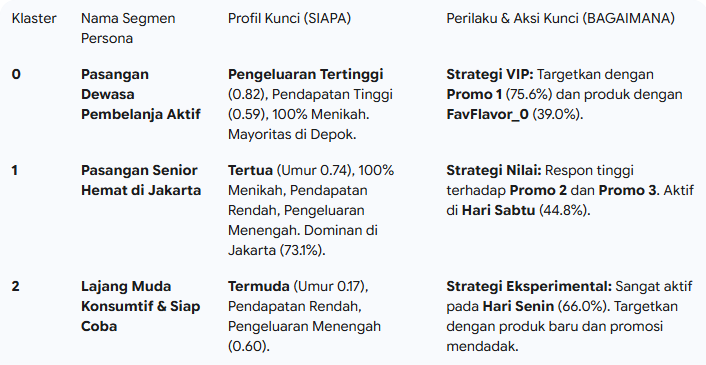
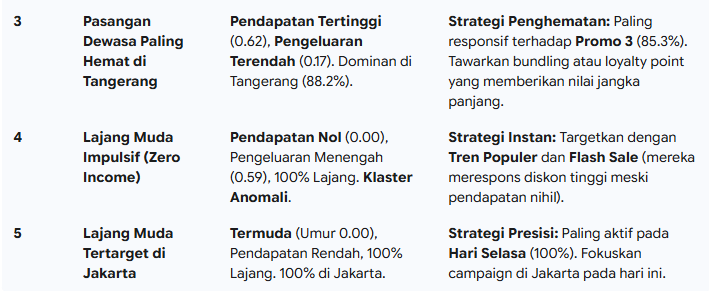

#**ASSOCIATION RULE**

In [ ]:
data_fiks

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,Kota_Depok,Kota_Jakarta,Kota_Tangerang,HariFav_Jumat,...,FavFlavor_3,FavFlavor_4,FavFlavor_5,FavFlavor_6,FavFlavor_7,FavFlavor_8,Kategori_Umur,Rasio_Pengeluaran,Pendapatan_per_Umur,Cluster
0,0,0.738095,0.270042,0.515152,1,1,False,True,False,False,...,False,False,False,False,False,False,Tua,1.907663,0.365863,1
1,0,0.333333,0.691983,0.858586,1,1,True,False,False,False,...,False,False,False,True,False,False,Dewasa,1.240760,2.075943,0
2,1,0.785714,0.329114,0.404040,1,2,False,True,False,False,...,True,False,False,False,False,False,Tua,1.227658,0.418872,1
3,1,0.023810,0.261603,0.545455,0,1,False,True,False,False,...,False,False,False,False,True,False,Muda,2.085036,10.986880,2
4,0,0.476190,0.413502,0.414141,1,2,False,True,False,False,...,False,False,False,False,False,True,Dewasa,1.001544,0.868353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0.309524,0.084388,0.727273,1,1,True,False,False,False,...,False,False,False,False,False,False,Dewasa,8.618081,0.272638,2
196,1,0.928571,0.329114,0.505051,1,1,False,True,False,False,...,False,False,True,False,False,False,Tua,1.534572,0.354430,1
197,0,0.404762,0.886076,0.787879,1,1,True,False,False,False,...,False,False,False,False,True,False,Dewasa,0.889177,2.189123,0
198,0,0.119048,0.025316,0.939394,1,0,True,False,False,False,...,False,False,False,False,False,False,Muda,37.104601,0.212656,2


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Helper: ubah set of items (frozenset) jadi string yang readable
def itemset_to_str(itemset):
    return ', '.join(sorted([str(x) for x in itemset]))

# Helper: format aturan jadi human readable
def pretty_rules(df_rules, top_n=10):
    out = []
    for i, row in df_rules.head(top_n).iterrows():
        ant = itemset_to_str(row['antecedents'])
        cons = itemset_to_str(row['consequents'])
        out.append({
            'rule': f"IF [{ant}] THEN [{cons}]",
            'support': row['support'],
            'confidence': row['confidence'],
            'lift': row['lift']
        })
    return pd.DataFrame(out)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
df_proc = data_fiks.copy()

# 1) Tangani missing
# Convert categorical columns to object type before filling
for col in ['Jenis Kelamin', 'Menikah', 'Promo']:
    if col in df_proc.columns and pd.api.types.is_categorical_dtype(df_proc[col]):
        df_proc[col] = df_proc[col].astype(object)

df_proc = df_proc.fillna({
    'Jenis Kelamin': 'Unknown',
    'Menikah': 0, # Assuming 0 is a valid representation for 'belum menikah' or similar
    'Promo': 'Promo_Unknown'
})

# Convert columns back to categorical where appropriate
for col in ['Jenis Kelamin', 'Menikah', 'Promo']:
     if col in df_proc.columns:
         # Ensure all unique values are included in categories
         df_proc[col] = df_proc[col].astype('category')

# other cols: fillna as required
df_proc['Promo'] = df_proc['Promo'].astype(str)  # treat as categorical

# 2) Binning numeric ke kategori (opsional tapi direkomendasikan)
# Umur: buat Kategori_Umur jika belum ada
if 'Kategori_Umur' not in df_proc.columns:
    bins = [0, 25, 45, 120]
    labels = ['Muda','Dewasa','Tua']
    # Ensure Umur is numeric before binning, use the original scaled Umur
    if 'Umur' in df_proc.columns:
         df_proc['Kategori_Umur'] = pd.cut(df_proc['Umur'].astype(float), bins=bins, labels=labels, include_lowest=True)


# Pendapatan-per-bulan -> kategori (low/med/high)
# Use the scaled 'Pendapatan-per-bulan' which is already between 0 and 1
if 'Pendapatan_Kat' not in df_proc.columns:
    # Assuming the Pendapatan-per-bulan in df_proc is already scaled
    # Recalculate percentiles based on the scaled data if needed, or use fixed bins for scaled data
    # For simplicity, let's use fixed bins for the 0-1 range of scaled data
    bins_inc = [0, 0.33, 0.66, 1.0]
    labels_inc = ['LowInc','MidInc','HighInc']
    df_proc['Pendapatan_Kat'] = pd.cut(
        df_proc['Pendapatan-per-bulan'],
        bins=bins_inc,
        labels=labels_inc,
        include_lowest=True
    )

# skor-pengeluaran -> kategori
# Use the scaled 'skor-pengeluaran'
if 'Skor_Pengeluaran_Kat' not in df_proc.columns:
    # Assuming the skor-pengeluaran in df_proc is already scaled (0-1)
    df_proc['Skor_Pengeluaran_Kat'] = pd.qcut(df_proc['skor-pengeluaran'],
                                              q=3, labels=['LowSpend','MidSpend','HighSpend'])


# 3) Pilih kolom kategori yang ingin dipakai di ARM
# (sesuaikan kalau ada/tdk ada di df)
categorical_cols = [
    'Jenis Kelamin', 'Menikah', 'Promo', 'Kota_Depok', 'Kota_Jakarta', 'Kota_Tangerang',
    'HariFav_Senin','HariFav_Selasa','HariFav_Rabu','HariFav_Kamis',
    'HariFav_Jumat','HariFav_Sabtu','HariFav_Minggu',
    'FavFlavor_0','FavFlavor_1','FavFlavor_2','FavFlavor_3','FavFlavor_4',
    'FavFlavor_5','FavFlavor_6','FavFlavor_7','FavFlavor_8',
    'Kategori_Umur','Pendapatan_Kat','Skor_Pengeluaran_Kat'
]

# Keep only columns that exist and are not the original numerical columns used for binning
categorical_cols = [c for c in categorical_cols if c in df_proc.columns]

# Convert boolean-like or numeric categorical into strings for get_dummies
df_cat = df_proc[categorical_cols].copy()

# If some cols are numeric 0/1 (e.g., FavFlavor_*), convert to bool/str
for c in df_cat.columns:
    if pd.api.types.is_numeric_dtype(df_cat[c]) and set(df_cat[c].dropna().unique()).issubset({0,1}):
        # Use .loc to avoid SettingWithCopyWarning
        df_cat.loc[:, c] = df_cat[c].map({0: f'{c}=False', 1: f'{c}=True'}).fillna(f'{c}=False')
    else:
        # Use .loc to avoid SettingWithCopyWarning
        df_cat.loc[:, c] = df_cat[c].astype(str).apply(lambda x: f"{c}={x}")


# Now one-hot encode using get_dummies on the prepared string values
df_onehot = pd.get_dummies(df_cat)
# df_onehot is now binary matrix ready for Apriori

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

MIN_SUPPORT = 0.15    # Naikkan sedikit agar kombinasi item lebih sedikit
MIN_LIFT = 1.2        # Tetap aman
MIN_CONFIDENCE = 0.3  # Supaya aturan yang diambil lebih kuat
MAX_LEN = 3           # Batasi panjang kombinasi itemset (penting!)
results_per_cluster = {}

for cluster_id in sorted(df_proc['Cluster'].unique()):
    sub_idx = df_proc['Cluster'] == cluster_id
    df_cluster_onehot = df_onehot.loc[sub_idx]

    n = df_cluster_onehot.shape[0]
    if n < 10:
        print(f"Cluster {cluster_id}: terlalu sedikit data ({n} rows) — skip")
        continue

    print(f"\nRunning cluster {cluster_id} (n={n}) ...")

    # ==== OPTIMASI UTAMA ====
    # 1️⃣ Gunakan max_len untuk membatasi panjang itemset (lebih cepat drastis)
    # 2️⃣ Gunakan low_memory=True agar Apriori tidak menyimpan semua kombinasi
    frequent_itemsets = apriori(
        df_cluster_onehot,
        min_support=MIN_SUPPORT,
        use_colnames=True,
        max_len=MAX_LEN,
        low_memory=True
    )

    if frequent_itemsets.empty:
        print(f"Cluster {cluster_id}: tidak ada itemset dengan support >= {MIN_SUPPORT}")
        continue

    # ==== Association Rules ====
    rules = association_rules(
        frequent_itemsets,
        metric="lift",
        min_threshold=MIN_LIFT
    )

    if rules.empty:
        print(f"Cluster {cluster_id}: tidak ada aturan dengan lift >= {MIN_LIFT}")
        continue

    # ==== Filter & sort ====
    rules = rules[rules['confidence'] >= MIN_CONFIDENCE]
    rules = rules.sort_values(by=['lift','confidence','support'], ascending=[False, False, False]).reset_index(drop=True)

    # ==== Buat tampilan lebih cepat ====
    rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    print(f"Cluster {cluster_id}: ditemukan {len(rules)} aturan")

    # Tampilkan hanya 3 aturan teratas agar cepat
    display(rules[['antecedents_str','consequents_str','support','confidence','lift']].head(3))

    # Simpan ke hasil
    results_per_cluster[cluster_id] = rules



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Running cluster 0 (n=41) ...
Cluster 0: ditemukan 138 aturan


,antecedents_str,consequents_str,support,confidence,lift
0,Promo_Promo=0,"Pendapatan_Kat_Pendapatan_Kat=MidInc, Kategori...",0.170732,0.777778,1.449495
1,"Pendapatan_Kat_Pendapatan_Kat=MidInc, Kategori...",Promo_Promo=0,0.170732,0.318182,1.449495
2,Promo_Promo=0,Skor_Pengeluaran_Kat_Skor_Pengeluaran_Kat=High...,0.195122,0.888889,1.349794



Running cluster 1 (n=67) ...
Cluster 1: ditemukan 778 aturan


,antecedents_str,consequents_str,support,confidence,lift
0,Promo_Promo=3,"Pendapatan_Kat_Pendapatan_Kat=LowInc, Skor_Pen...",0.238806,0.941176,3.002801
1,"Pendapatan_Kat_Pendapatan_Kat=LowInc, Skor_Pen...",Promo_Promo=3,0.238806,0.761905,3.002801
2,Promo_Promo=3,Skor_Pengeluaran_Kat_Skor_Pengeluaran_Kat=LowS...,0.253731,1.000000,2.791667



Running cluster 2 (n=53) ...
Cluster 2: ditemukan 419 aturan


,antecedents_str,consequents_str,support,confidence,lift
0,Pendapatan_Kat_Pendapatan_Kat=MidInc,Skor_Pengeluaran_Kat_Skor_Pengeluaran_Kat=MidS...,0.188679,0.625000,1.840278
1,Skor_Pengeluaran_Kat_Skor_Pengeluaran_Kat=MidS...,Pendapatan_Kat_Pendapatan_Kat=MidInc,0.188679,0.555556,1.840278
2,Kategori_Umur_Kategori_Umur=Dewasa,"Pendapatan_Kat_Pendapatan_Kat=LowInc, Menikah_...",0.207547,0.846154,1.793846



Running cluster 3 (n=34) ...
Cluster 3: ditemukan 230 aturan


,antecedents_str,consequents_str,support,confidence,lift
0,"Jenis Kelamin_Jenis Kelamin=0, Kategori_Umur_K...",Pendapatan_Kat_Pendapatan_Kat=HighInc,0.176471,0.500000,1.700000
1,Pendapatan_Kat_Pendapatan_Kat=HighInc,"Jenis Kelamin_Jenis Kelamin=0, Kategori_Umur_K...",0.176471,0.600000,1.700000
2,"Jenis Kelamin_Jenis Kelamin=0, Promo_Promo=3",Pendapatan_Kat_Pendapatan_Kat=HighInc,0.176471,0.461538,1.569231


Cluster 4: terlalu sedikit data (2 rows) — skip
Cluster 5: terlalu sedikit data (2 rows) — skip


hasil analisis asossiation rule



1.   Cluster 0 – Pelanggan Dewasa, Menengah, Pengeluaran Tinggi


> Pelanggan tanpa promo (Promo=0) cenderung berasal dari segmen menengah dan Dewasa.Mereka punya pengeluaran tinggi, walaupun tidak menerima promo.


2.   Cluster 1 – Pengguna Promo, Pengeluaran Rendah


> Jika pelanggan mendapat promo tipe 3, besar kemungkinan mereka termasuk Low Spender. dan Lift tinggi (3.0) menunjukkan hubungan kuat dan signifikan.

3. Cluster 2 – Pelanggan Menengah & Keluarga


> pelanggan berpendapatan menengah juga berpengeluaran menengah. dan pelanggan dewasa yang sudah menikah dengan pendapatan rendah.

4. Cluster 3 – Pria Dewasa, Pendapatan Tinggi


> Laki-laki dewasa cenderung punya pendapatan tinggi. Bahkan saat diberi promo tipe 3, mereka masih didominasi kelompok berpendapatan tinggi.















## **KESIMPULAN DARI ASSOSIATION RULE:**
2. **Informasi / insight dan saran / rekomendasi / strategi**

dari hasil assosiation rule diatas kita dapat informasi ada 4 segmen yang perlu diperhatikan untuk meningkatkan penjualan untuk perusahaan MixITup maka saya ingin memberikan strategi untuk 4 cluster itu:

Pelanggan Dewasa, Menengah, Pengeluaran Tinggi mungkin tidak terlalu sensitif terhadap promo, jadi strategi upselling atau penawaran premium bisa lebih efektif daripada diskon besar. rekomendasi untuk segmen ini Fokuskan strategi loyalty program premium atau penawaran eksklusif non-diskon.

pelanggan mendapat promo tipe 3 memiliki pengeluaran rendah sekaligus yang paling banyak. kita dapat informasi promo 3 pada segmen  ini tidak efektif untuk menaikkan spending karena skor pengeluaran yang rendah. rekomendasi saya Evaluasi efektivitas promo tipe 3 — ubah menjadi promo bersyarat (minimum pembelian) atau bundling produk bernilai tinggi.


Pelanggan Menengah & Keluarga Segmen keluarga dengan pengeluaran menengah–rendah. Cenderung stabil dan responsif dari pendapatan dan juga skor pengeluaran. saya rekomendasikan promo bundling keluarga atau paket hemat jangka panjang.


Laki-laki dewasa cenderung punya pendapatan tinggi. segmen ini tidak terlalu banyak tapi mereka yang lebih memberi peluang untuk peningkatan spending. rekomendasi dari saya untuk segment ini Tawarkan produk eksklusif atau premium membership. Gunakan pendekatan personalisasi berbasis gaya hidup.



kesimpulan strategi/rekomendasi yang bisa diterapkan untuk meningkatkan keuntungan perusahaan:
1. loyalty program premium atau penawaran eksklusif non-diskon.
2. Evaluasi efektivitas promo tipe 3 — ubah menjadi promo bersyarat (minimum pembelian) atau bundling produk bernilai tinggi.
3. promo bundling keluarga atau paket hemat jangka panjang.
4. produk eksklusif atau premium membership. Gunakan pendekatan personalisasi berbasis gaya hidup.